<a href="https://colab.research.google.com/github/radhikark0707/my-data-analysis/blob/main/Linear_and_Polynominal_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR AND POLYNOMIAL REGRESSSION

In [4]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#load and display first 5 rows
data=pd.read_csv('/content/Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
#Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [7]:
#Statistical summary
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [8]:
#drop
data=data.drop(columns=['Unnamed: 0'])

In [9]:
#to verify Unnamed: 0 is dropped
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [10]:
#missing values
data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [11]:
#split into feature and target variable
y=data['Salary']
x=data[['YearsExperience']].values

In [12]:
#split data into test and training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
#create and train linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
#make prediction
y_pred=model.predict(x_test)

In [15]:
#Evaluate model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [16]:
print('R2 Score:',r2)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)

R2 Score: 0.9024461774180497
Mean Absolute Error: 6286.453830757745
Mean Squared Error: 49830096.855908394


In [17]:
#visualize linear regression model

Text(0.5, 1.0, 'Linear Regression Model')

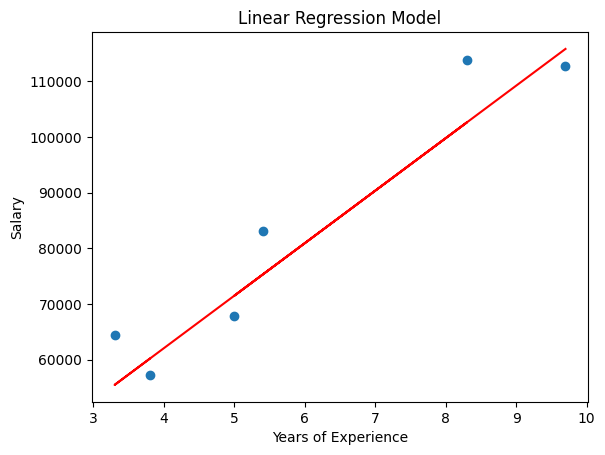

In [18]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Model')

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)

In [20]:
x_train_poly,x_test_poly,y_train,y_test=train_test_split(x_poly,y,test_size=0.2,random_state=42)

In [21]:
poly_model=LinearRegression()
poly_model.fit(x_train_poly,y_train)

LinearRegression()

In [22]:
y_pred_poly=poly_model.predict(x_test_poly)

In [23]:
r2_poly=r2_score(y_test,y_pred_poly)
mae_poly=mean_absolute_error(y_test,y_pred_poly)
mse_poly=mean_squared_error(y_test,y_pred_poly)

In [24]:
print('R2 Score:',r2_poly)
print('Mean Absolute Error:',mae_poly)
print('Mean Squared Error:',mse_poly)

R2 Score: 0.8971645780890873
Mean Absolute Error: 6381.371429702194
Mean Squared Error: 52527916.3687748


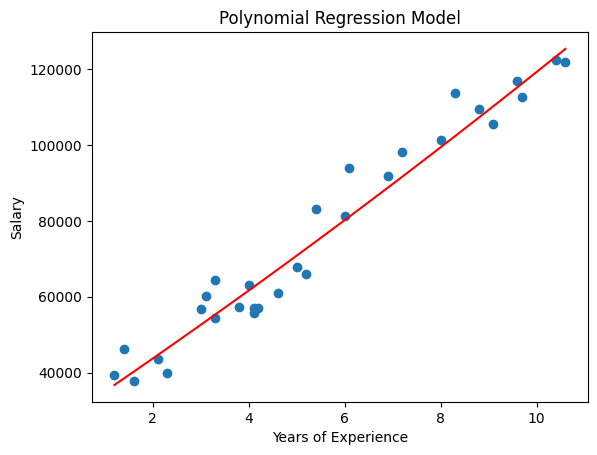

In [25]:
x_range=np.linspace(x.min(),x.max(),100).reshape(-1,1)
x_poly_range=poly.transform(x_range)
y_pred_range=poly_model.predict(x_poly_range)
plt.scatter(x,y)
plt.plot(x_range,y_pred_range,color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Polynomial Regression Model')
plt.show()